In [1]:
#0:Importing Libraries
import numpy as np#provides numerical efficiency
import pandas as pd#provides dataframes for structured data handling
import matplotlib.pyplot as plt#used for plotting graphs(Confusion and Feature importance)

from sklearn.model_selection import train_test_split#helps to split dataset for train,test
from sklearn.preprocessing import StandardScaler, LabelEncoder#used to standardize values;convert categorical text labels to int
from sklearn.ensemble import RandomForestClassifier#used to import the model RandomForestClassfier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report#metrics to see how our moedel fares

In [2]:
#1:Load the dataset
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv") #loads HR attrition CSV into df
print("Dataset Shape:",df.shape) #returns the no. of rows,col of dataset
print("\nFirst 5 Rows of Dataset:\n")
print(df.head())#returns 1st 5 rows of the dataset

Dataset Shape: (1470, 35)

First 5 Rows of Dataset:

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipS

In [3]:
#2:Preprocess categories the dataset
df['Attrition']=df['Attrition'].map({'Yes':1,'No':0})#convert Yes/No target to 1/0
label_encoder=LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col]=label_encoder.fit_transform(df[col])#basically converts each category variable into int label

In [4]:
#3:Define Feaatures and Target
X=df.drop('Attrition', axis=1)#input features;drop will make sure the the entire col(axis=1) of Attrition is dropped
y=df['Attrition']# target label i.e Attrtion
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)# split dataset as 80:20 for train:test

In [5]:
#4:Scalaring
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)#computes mean and std dev only on training data
X_test=scaler.transform(X_test)#applies same transformation to test data,prevents data leakage

In [6]:
#5:Training random forest
rf_model=RandomForestClassifier(n_estimators=200,random_state=42)#number of decision trees in the forest
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [7]:
#6:Prediction
y_pred=rf_model.predict(X_test)


Model Accuracy: 0.8707482993197279

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



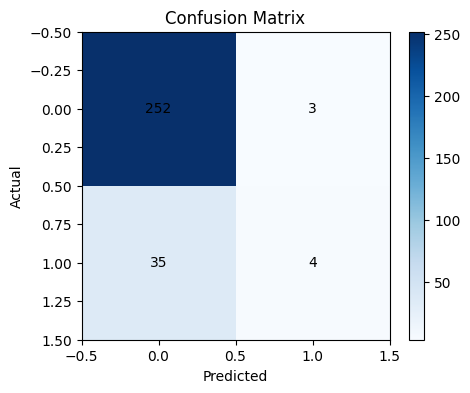

In [8]:
#7:Evaluation
print("\nModel Accuracy:",accuracy_score(y_test,y_pred))#gives accuracy score
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))
# classification report gives the following:
# 1.Precision->correctness of positive predictions
# 2.Recall->ability to capture actual attrition cases
# 3.F1-Score->harmonic mean of precision & recall

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm,cmap='Blues')#visual heatmap representation
plt.title("Confusion Matrix")#gives matrix of TP,TN,FP,FN
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()

for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j,i,cm[i][j],ha='center',va='center')#writes numeric values inside each cell
plt.show()

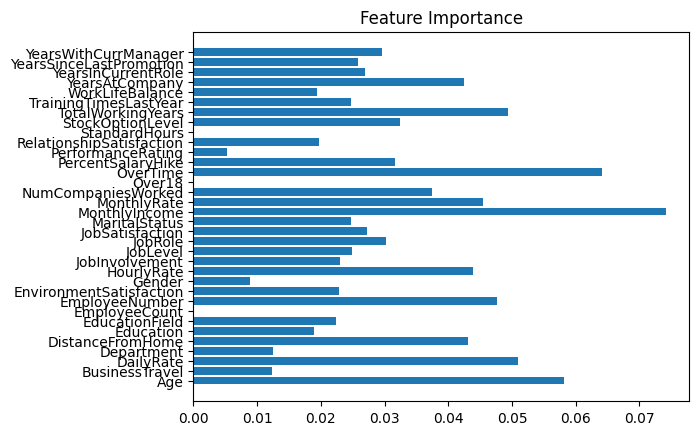

In [9]:
#8:Feature importance; Higher value->stronger influence on prediction
plt.barh(X.columns, rf_model.feature_importances_)#measures how much each feature reduces impurity:Gini index
plt.title("Feature Importance")
plt.show()

#Overall Notes:
1. Importing Required Libraries:
- NumPy(np) is imported to support numerical computations and array operations.
- Although not used directly, NumPy is internally required by scikit-learn for
efficient mathematical processing
- Pandas(pd) is imported to handle structured data
- It provides the DataFrame data structure, which is used to store, manipulate,
and analyze tabular data such as CSV files
- Matplotlib(plt) is imported to visualize results
- It is used to plot the confusion matrix and feature importance graph
---
2. Importing Scikit-Learn Modules:
- train_test_split is imported from sklearn.model_selection
- It splits the dataset into training and testing subsets to evaluate model performance on unseen data
- StandardScaler is imported to normalize numerical features
- It standardizes data using Z-score normalization:
(x-mean)/standard deviation
- LabelEncoder is imported to convert categorical string values into numerical labels so that machine learning models can process them
- RandomForestClassifier is imported from sklearn.ensemble
- It is an ensemble learning algorithm that builds multiple decision trees and combines their predictions using majority voting
- accuracy_score, confusion_matrix, and classification_report are imported to evaluate model performance using accuracy, error distribution, and class-wise metrics
---
3. Loading the Dataset:
- WA_Fn-UseC_-HR-Employee-Attrition.csv is a real IBM attrition dataset present in Kaggle
- The CSV file WA_Fn-UseC_-HR-Employee-Attrition.csv is loaded into a Pandas
DataFrame using pd.read_csv()
- Each row represents one employee and each column represents an HR attribute
- df.shape is used to display the total number of rows and columns in the dataset
- This helps verify dataset size and dimensionality
- df.head() displays the first five rows of the dataset
- It is used for understanding data structure, column names, and data types
---
4. Encoding the Target Variable:
- The Attrition column contains categorical values ('Yes' and 'No')
- These are converted into numerical values using mapping:
  - Yes -> 1 i.e employee left
  - No -> 0 i.e employee stayed
- This conversion is required because machine learning algorithms
operate only on numerical data
---
5. Encoding Categorical Features:
- LabelEncoder object is created to encode categorical columns
- select_dtypes(include=['object']) identifies all columns containing
categorical (string) values such as JobRole, Department, Gender, etc
- fit_transform() converts each categorical value into a unique integer
- For example:
Sales -> 2
Research -> 4
- Random Forest can safely handle these encoded values because it is
tree-based and does not assume linear ordering
---
6. Separating Features and Target
- X contains all independent variables (features) by dropping the Attrition column.
- These are the inputs to the machine learning model
- y contains the Attrition column, which is the dependent variable
(target output) that the model learns to predict
---
7. Splitting Training and Testing Data:
- The dataset is split into training and testing sets using train_test_split()
- 80% of the data is used for training and 20% for testing
- random_state=42 ensures reproducibility, meaning the same data split
will occur every time the code is executed
---
8. Feature Scaling:
- StandardScaler object is initialized to normalize numerical features
- fit_transform() is applied on training data to calculate mean and standard
deviation and scale the values accordingly
- transform() is applied on test data using the same scaling parameters
- This prevents data leakage and ensures fair evaluation
---
9. Random Forest Model Initialization:
- RandomForestClassifier is initialized with n_estimators=200
- This means 200 decision trees are built in the forest
- Each tree is trained on a random subset of data and features,
which improves generalization and reduces overfitting
---
10. Model Training:
- fit(X_train, y_train) trains the Random Forest model
- Each decision tree learns patterns independently, and the final
prediction is based on majority voting
---
11. Making Predictions:
- predict(X_test) generates predictions for unseen test data
- The output is either 0->employee stays or 1->employee leaves
---
12. Model Evaluation:
- accuracy_score calculates the proportion of correctly predicted samples
out of the total test samples
- classification_report provides detailed evaluation metrics such as:
  - Precision:correctness of positive predictions
  - Recall:ability to detect actual attrition cases
  - F1-score:balance between precision and recall
---
13. Confusion Matrix Visualization:
- confusion_matrix creates a matrix showing:
  - True Positives, True Negatives, False Positives, False Negatives
- imshow() displays the confusion matrix as a heatmap
- Color intensity represents prediction counts
- plt.text() is used to display numeric values inside each matrix cell
for better interpretability
---
14. Feature Importance Analysis:
- feature_importances_ measures how much each feature contributes
to reducing classification error across all trees
- A horizontal bar chart is plotted to visualize feature importance
- Higher values indicate stronger influence on employee attrition
---
15. Why Random Forest is Suitable for Attrition Prediction?
- Random Forest handles non-linear relationships effectively
- It is robust to noise, outliers and mixed feature types
- It requires minimal preprocessing and performs well on tabular HR data,
making it a strong baseline model for employee attrition prediction

---